In [1]:
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/biomass_N_P.csv"
df= data.frame(read_csv(url(github), show_col_types=FALSE))

head(df, 5)

,season,cultivar,treatment,rep,biomass,nitrogen,phosphorus
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,cv1,N0,1,9.16,1.23,0.41
2,2022,cv1,N0,2,13.06,1.49,0.45
3,2022,cv1,N0,3,8.40,1.18,0.31
4,2022,cv1,N0,4,11.97,1.42,0.48
5,2022,cv1,N1,1,24.90,1.77,0.49


In [3]:
library(dplyr)
library(tidyr)
df1= data.frame(df %>%
                   pivot_longer(
                                cols= c(nitrogen, phosphorus),
                                names_to= "nutrient",
                                values_to= "uptake")
                                )
head(df1, 5)

,season,cultivar,treatment,rep,biomass,nutrient,uptake
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,2022,cv1,N0,1,9.16,nitrogen,1.23
2,2022,cv1,N0,1,9.16,phosphorus,0.41
3,2022,cv1,N0,2,13.06,nitrogen,1.49
4,2022,cv1,N0,2,13.06,phosphorus,0.45
5,2022,cv1,N0,3,8.40,nitrogen,1.18


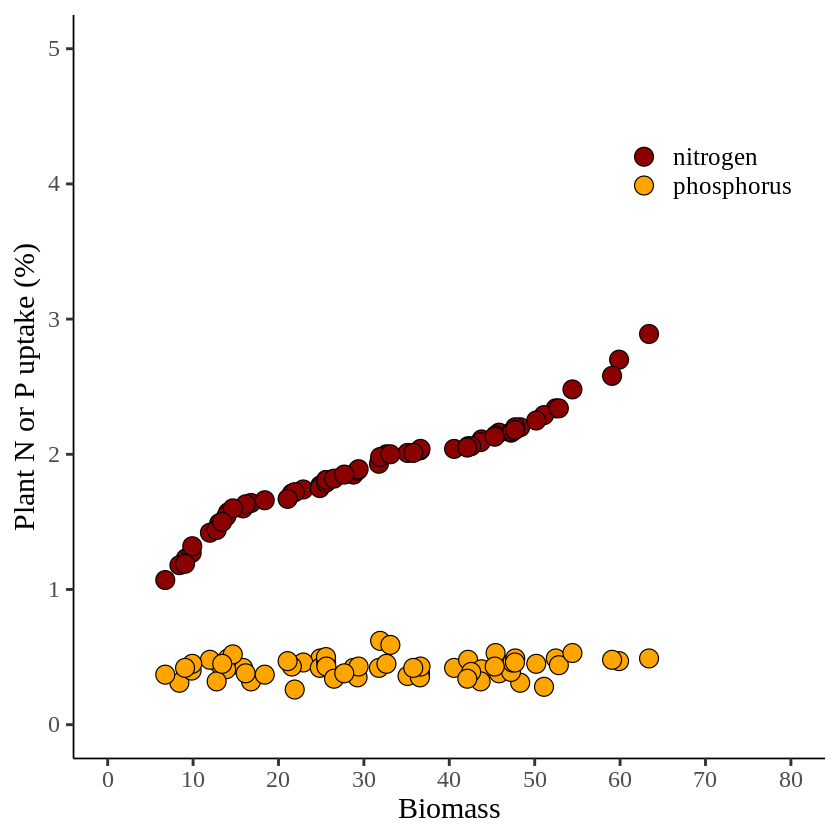

In [4]:
library(ggplot2)
ggplot(data=df1, aes(x=biomass, y=uptake))+
       geom_point(aes(fill=as.factor(nutrient), shape=as.factor(nutrient)),
       color="black", size=5) +
       scale_fill_manual(values= c("darkred","orange")) +
       scale_shape_manual(values= c(21,21)) +
       scale_x_continuous(breaks=seq(0,80,10),limits=c(0,80)) +
       scale_y_continuous(breaks=seq(0,5,1),limits=c(0,5)) +
       labs(x="Biomass", y="Plant N or P uptake (%)") +
       theme_classic(base_size=18, base_family="serif") +
       theme(legend.position=c(0.85,0.80),
             legend.title=element_blank(),
             legend.key=element_rect(color="white", fill="white"),
             legend.text=element_text(family="serif", face="plain",
                         size=15, color="black"),
             legend.background= element_rect(fill="white"),
             strip.background=element_rect(color="white", linewidth=0.5,
                              linetype="solid"),
             axis.line = element_line(linewidth = 0.5, colour="black"))

### 1) Z-Score Normalization

In [5]:
library(dplyr)
dataA= data.frame(df %>%
                  group_by(season, cultivar) %>%
                  dplyr::mutate(
                     Normalized_biomass=(biomass-mean(biomass))/sd(biomass),
                     Normalized_N=(nitrogen-mean(nitrogen))/sd(nitrogen),
                     Normalized_P=(phosphorus-mean(phosphorus))/sd(phosphorus)
                  ))
Z_Score_Normalization=dataA[,c(-5,-6,-7)]

head(Z_Score_Normalization, 5)

,season,cultivar,treatment,rep,Normalized_biomass,Normalized_N,Normalized_P
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,cv1,N0,1,-1.6187589,-1.9459123,0.0388260
2,2022,cv1,N0,2,-1.3429185,-1.1615136,0.6600419
3,2022,cv1,N0,3,-1.6725124,-2.0967583,-1.5142138
4,2022,cv1,N0,4,-1.4200123,-1.3726979,1.1259539
5,2022,cv1,N1,1,-0.5054952,-0.3167764,1.2812579


In [6]:
library(dplyr)
library(tidyr)
Z_Score_Normalization1= data.frame(Z_Score_Normalization %>%
                        pivot_longer(
                                     cols= c(Normalized_N, Normalized_P),
                                     names_to= "nutrient",
                                     values_to= "uptake")
                                     )

head(Z_Score_Normalization1, 5)

,season,cultivar,treatment,rep,Normalized_biomass,nutrient,uptake
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,2022,cv1,N0,1,-1.618759,Normalized_N,-1.9459123
2,2022,cv1,N0,1,-1.618759,Normalized_P,0.0388260
3,2022,cv1,N0,2,-1.342918,Normalized_N,-1.1615136
4,2022,cv1,N0,2,-1.342918,Normalized_P,0.6600419
5,2022,cv1,N0,3,-1.672512,Normalized_N,-2.0967583


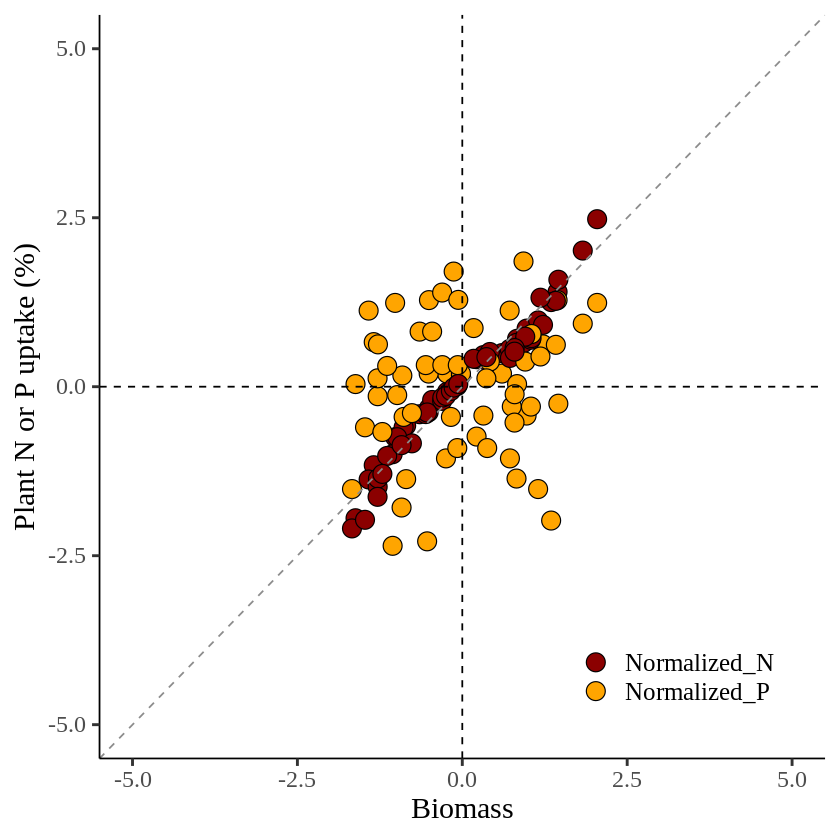

In [8]:
library(ggplot2)
ggplot(data=Z_Score_Normalization1, aes(x=Normalized_biomass, y=uptake)) +
       geom_point(aes(fill=as.factor(nutrient), shape=as.factor(nutrient)),
                  color="black", size=5) +
       scale_fill_manual(values= c("darkred","orange")) +
       scale_shape_manual(values= c(21,21)) +
       scale_x_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
       scale_y_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
       geom_vline(xintercept=0, linetype="dashed", color="black") +
       geom_hline(yintercept=0, linetype="dashed", color= "black") +
       geom_abline (slope=1, linetype= "dashed", color="grey55", linewidth=0.5) +
       labs(x="Biomass", y="Plant N or P uptake (%)") +
       theme_classic(base_size=18, base_family="serif") +
       theme(legend.position=c(0.80,0.12),
             legend.title=element_blank(),
             legend.key=element_rect(color="white", fill="white"),
             legend.text=element_text(family="serif", face="plain",
                         size=15, color="black"),
             legend.background= element_rect(fill="white"),
             axis.line = element_line(linewidth = 0.5, colour="black"))

In [9]:
dataA = data.frame(df %>%
  group_by(season, cultivar) %>%
  dplyr::mutate(
         Normalized_biomass= scale(biomass, center= TRUE, scale= TRUE),
         Normalized_N= scale(nitrogen, center= TRUE, scale= TRUE),
         Normalized_P= scale(phosphorus, center= TRUE, scale= TRUE)
                 ))
Z_Score_Normalization=dataA[,c(-5,-6,-7)]

head(Z_Score_Normalization, 5)

,season,cultivar,treatment,rep,Normalized_biomass,Normalized_N,Normalized_P
,<dbl>,<chr>,<chr>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,2022,cv1,N0,1,-1.6187589,-1.9459123,0.0388260
2,2022,cv1,N0,2,-1.3429185,-1.1615136,0.6600419
3,2022,cv1,N0,3,-1.6725124,-2.0967583,-1.5142138
4,2022,cv1,N0,4,-1.4200123,-1.3726979,1.1259539
5,2022,cv1,N1,1,-0.5054952,-0.3167764,1.2812579


### 2) Min-Max Normalization

In [10]:
library(dplyr)
dataB= data.frame(df %>%
       group_by(season, cultivar) %>%
       dplyr::mutate(
       Normalized_biomass=(biomass-min(biomass))/(max(biomass)-min(biomass)),
       Normalized_N=(nitrogen-min(nitrogen))/(max(nitrogen)-min(nitrogen)),
       Normalized_P=(phosphorus-min(phosphorus))/(max(phosphorus)-min(phosphorus))
                     ))
Min_Max_Normalization=dataB[,c(-5,-6,-7)]

head(Min_Max_Normalization, 5)

,season,cultivar,treatment,rep,Normalized_biomass,Normalized_N,Normalized_P
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,cv1,N0,1,0.01724529,0.04310345,0.6190476
2,2022,cv1,N0,2,0.10574087,0.26724138,0.8095238
3,2022,cv1,N0,3,0.00000000,0.00000000,0.1428571
4,2022,cv1,N0,4,0.08100749,0.20689655,0.9523810
5,2022,cv1,N1,1,0.37440436,0.50862069,1.0000000


In [18]:
library(dplyr)
library(tidyr)
Min_Max_Normalization1= data.frame(Min_Max_Normalization %>%
                          pivot_longer(
                                       cols= c(Normalized_N, Normalized_P),
                                       names_to= "nutrient",
                                       values_to= "uptake")
                                       )

head(Min_Max_Normalization1, 5)

,season,cultivar,treatment,rep,Normalized_biomass,nutrient,uptake
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,2022,cv1,N0,1,0.01724529,Normalized_N,0.04310345
2,2022,cv1,N0,1,0.01724529,Normalized_P,0.61904762
3,2022,cv1,N0,2,0.10574087,Normalized_N,0.26724138
4,2022,cv1,N0,2,0.10574087,Normalized_P,0.80952381
5,2022,cv1,N0,3,0.00000000,Normalized_N,0.00000000


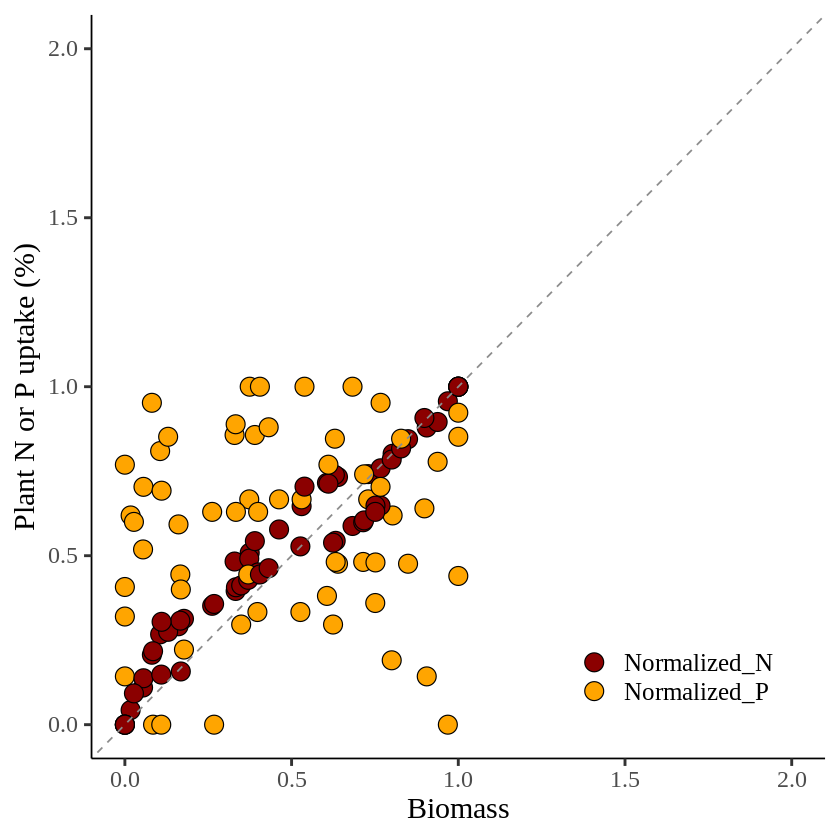

In [14]:
library(ggplot2)
ggplot(data=Min_Max_Normalization1, aes(x=Normalized_biomass, y=uptake))+
       geom_point(aes(fill=as.factor(nutrient),
       shape=as.factor(nutrient)), color="black", size=5) +
       scale_fill_manual(values=c("darkred","orange")) +
       scale_shape_manual(values=c(21,21)) +
       scale_x_continuous(breaks=seq(0,2,0.5), limits=c(0,2)) +
       scale_y_continuous(breaks=seq(0,2,0.5), limits=c(0,2)) +
       geom_abline (slope=1, linetype= "dashed", color="grey55", linewidth=0.5) +
       labs(x="Biomass", y="Plant N or P uptake (%)") +
       theme_classic(base_size=18, base_family="serif") +
       theme(legend.position=c(0.80,0.12),
             legend.title=element_blank(),
             legend.key=element_rect(color="white", fill="white"),
             legend.text=element_text(family="serif", face="plain",size=15,
                                      color="black"),
             legend.background=element_rect(fill="white"),
             axis.line=element_line(linewidth=0.5, colour="black"))

### 3) Robust Scaling Normalization

In [15]:
library(dplyr)
dataC = data.frame(df %>%
                   group_by(season, cultivar) %>%
                   dplyr::mutate(
                   Normalized_biomass=(biomass-median(biomass)) / (quantile(biomass, 0.75)-quantile(biomass,0.25)),
                   Normalized_N=(nitrogen-median(nitrogen)) / (quantile(nitrogen, 0.75)-quantile(nitrogen,0.25)),
                   Normalized_P=(phosphorus-median(phosphorus)) / (quantile(phosphorus, 0.75)-quantile(phosphorus,0.25))
                   ))
Robust_Scaling_Normalization=dataC[,c(-5,-6,-7)]

head(Robust_Scaling_Normalization, 5)

,season,cultivar,treatment,rep,Normalized_biomass,Normalized_N,Normalized_P
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,cv1,N0,1,-1.2548462,-2.1294964,-0.1176471
2,2022,cv1,N0,2,-1.0532437,-1.3812950,0.3529412
3,2022,cv1,N0,3,-1.2941329,-2.2733813,-1.2941176
4,2022,cv1,N0,4,-1.1095890,-1.5827338,0.7058824
5,2022,cv1,N1,1,-0.4411993,-0.5755396,0.8235294


In [16]:
library(dplyr)
library(tidyr)
Robust_Scaling_Normalization1= data.frame(Robust_Scaling_Normalization %>%
                        pivot_longer(
                                     cols= c(Normalized_N, Normalized_P),
                                     names_to= "nutrient",
                                     values_to= "uptake")
                                     )

head(Robust_Scaling_Normalization1, 5)

,season,cultivar,treatment,rep,Normalized_biomass,nutrient,uptake
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,2022,cv1,N0,1,-1.254846,Normalized_N,-2.1294964
2,2022,cv1,N0,1,-1.254846,Normalized_P,-0.1176471
3,2022,cv1,N0,2,-1.053244,Normalized_N,-1.3812950
4,2022,cv1,N0,2,-1.053244,Normalized_P,0.3529412
5,2022,cv1,N0,3,-1.294133,Normalized_N,-2.2733813


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


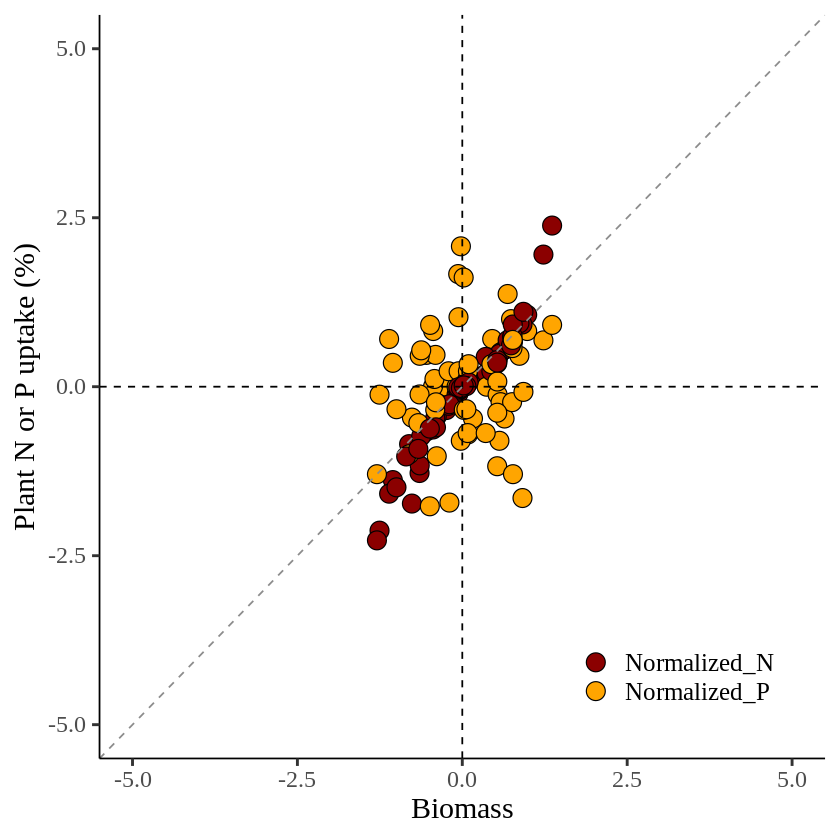

In [17]:
ggplot(data=Robust_Scaling_Normalization1, aes(x=Normalized_biomass, y=uptake))+
       geom_point(aes(fill=as.factor(nutrient), shape=as.factor(nutrient)),
                  color="black", size=5) +
       scale_fill_manual(values=c("darkred","orange")) +
       scale_shape_manual(values=c(21,21)) +
       scale_x_continuous(breaks=seq(-5,5,2.5), limits=c(-5,5)) +
       scale_y_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
       geom_vline(xintercept=0, linetype="dashed", color="black") +
       geom_hline(yintercept=0, linetype="dashed", color= "black") +
       geom_abline (slope=1, linetype= "dashed", color="grey55", linewidth=0.5) +
       labs(x="Biomass", y="Plant N or P uptake (%)") +
       theme_classic(base_size=18, base_family="serif") +
       theme(legend.position=c(0.80,0.12),
             legend.title=element_blank(),
             legend.key=element_rect(color="white", fill="white"),
             legend.text=element_text(family="serif", face="plain",size=15,
                                      color="black"),
             legend.background=element_rect(fill="white"),
             axis.line=element_line(linewidth=0.5, colour="black"))

### Log Transformation

In [19]:
library(dplyr)
dataD = data.frame(df %>%
                     group_by(season, cultivar) %>%
                     dplyr::mutate(
                                   Normalized_biomass= log10(biomass),
                                   Normalized_N= log10(nitrogen),
                                   Normalized_P= log10(phosphorus)
                     ))
Log_Transformation=dataD[,c(-5,-6,-7)]

head(Log_Transformation, 5)

,season,cultivar,treatment,rep,Normalized_biomass,Normalized_N,Normalized_P
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,cv1,N0,1,0.9618955,0.08990511,-0.3872161
2,2022,cv1,N0,2,1.1159432,0.17318627,-0.3467875
3,2022,cv1,N0,3,0.9242793,0.07188201,-0.5086383
4,2022,cv1,N0,4,1.0780942,0.15228834,-0.3187588
5,2022,cv1,N1,1,1.3961993,0.24797327,-0.3098039


In [20]:
library(dplyr)
library(tidyr)
Log_Transformation1= data.frame(Log_Transformation %>%
                                pivot_longer(
                                cols= c(Normalized_N, Normalized_P),
                                names_to= "nutrient",
                                values_to= "uptake"))

head(Log_Transformation1, 5)

,season,cultivar,treatment,rep,Normalized_biomass,nutrient,uptake
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,2022,cv1,N0,1,0.9618955,Normalized_N,0.08990511
2,2022,cv1,N0,1,0.9618955,Normalized_P,-0.38721614
3,2022,cv1,N0,2,1.1159432,Normalized_N,0.17318627
4,2022,cv1,N0,2,1.1159432,Normalized_P,-0.34678749
5,2022,cv1,N0,3,0.9242793,Normalized_N,0.07188201


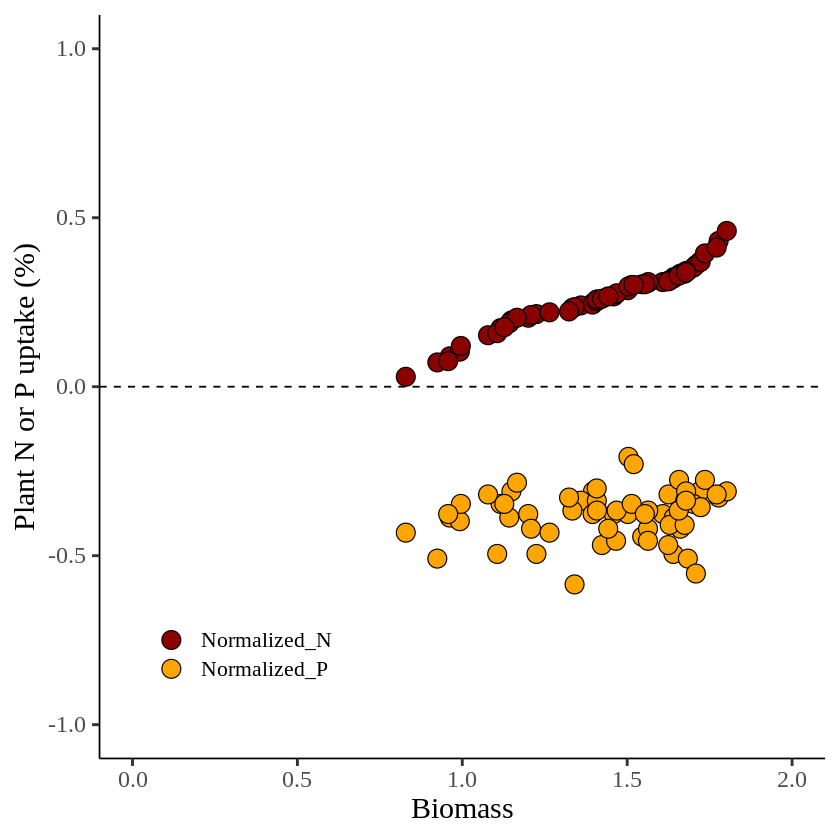

In [21]:
library(ggplot2)
ggplot(data=Log_Transformation1, aes(x=Normalized_biomass, y=uptake)) +
       geom_point(aes(fill=as.factor(nutrient), shape=as.factor(nutrient)),
                  color="black", size=5) +
       scale_fill_manual(values= c("darkred","orange")) +
       scale_shape_manual(values= c(21,21)) +
       scale_x_continuous(breaks=seq(0,2,0.5),limits=c(0,2)) +
       scale_y_continuous(breaks=seq(-1,1,0.5),limits=c(-1,1)) +
       geom_hline(yintercept=0, linetype="dashed", color="black") +
       labs(x="Biomass", y="Plant N or P uptake (%)") +
       theme_classic(base_size=18, base_family="serif") +
       theme(legend.position=c(0.2,0.15),
             legend.title=element_blank(),
             legend.key=element_rect(color="white", fill="white"),
             legend.text=element_text(family="serif", face="plain", size=13,
                         color="black"),
             legend.background= element_rect(fill="white"),
             axis.line = element_line(linewidth = 0.5, colour="black"))